##### 使用 Requests 傳送訊息
除了可以透過 LINE Message API 傳送訊息，LINE 也提供使用 requests 的方式傳送訊息，只要輸入正確的 Access Token，就能在任何地方與 LINE 溝通，\
這篇教學會介紹如何使用 Requests 傳送訊息。

##### 取得 Access Token 
參考「建立 LINE Channel」文章，建立一個 LINE Channel，在 Message API 頁籤裡，取得 Access Token。

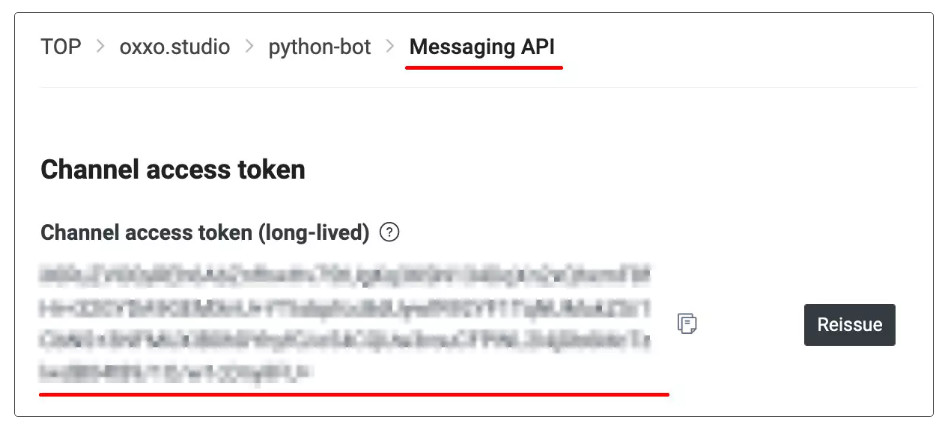

##### reply message 回覆訊息 
下方的程式碼，使用 requests 函式庫，搭配 LINE reply message 的 API，輸入收到訊息後的 replyToken，就能向發送訊息的使用者回覆訊息\
( replyToken 只有在收到使用者發送訊息時才會包含在訊息裡 )。

In [ ]:
import requests, json
headers = {'Authorization':'Bearer 你的 access token','Content-Type':'application/json'}
body = {
    'replyToken':replyToken,
    'messages':[{
            'type': 'text',
            'text': 'hello'
        }]
}
req = requests.request('POST', 'https://api.line.me/v2/bot/message/reply', headers=headers,data=json.dumps(body).encode('utf-8'))
print(req.text)

##### push message 主動傳送訊息 
下方的程式碼，使用 requests 函式庫，搭配 LINE push message 的 API，輸入指定使用者的 user ID，執行程式後，就能向使用者發送訊息。

In [ ]:
import requests, json
# 注意前方要有 Bearer
headers = {'Authorization':'Bearer 你的 access token','Content-Type':'application/json'}
body = {
    'to':'你的 user ID',
    'messages':[{
            'type': 'text',
            'text': 'hello'
        }]
    }
# 向指定網址發送 request
req = requests.request('POST', 'https://api.line.me/v2/bot/message/push',headers=headers,data=json.dumps(body).encode('utf-8'))
# 印出得到的結果
print(req.text)

##### 文字訊息格式 
使用下方的格式，會傳送文字訊息。

In [ ]:
{
    "type": "text",
    "text": "Hello, world"
}

##### 圖片訊息格式 
使用下方的格式，會傳送網路上的某張圖片 ( 需有圖片網址 )，originalContentUrl 表示原始圖片大小，previewImageUrl 表示訊息中的預覽圖片。

In [ ]:
{
    "type": "image",
    "originalContentUrl": "https://example.com/original.jpg",
    "previewImageUrl": "https://example.com/preview.jpg"
}

##### 影片訊息格式 
使用下方的格式，會傳送網路上的某支影片 ( 需有影片網址 )，originalContentUrl 表示原始影片，previewImageUrl 表示訊息中的預覽圖片。

In [ ]:
{
    "type": "video",
    "originalContentUrl": "https://example.com/original.mp4",
    "previewImageUrl": "https://example.com/preview.jpg",
    "trackingId": "track-id"
}

##### 聲音訊息格式 
使用下方的格式，會傳送網路上的某段聲音 ( 需有聲音網址 )，originalContentUrl 表示原始聲音，duration 聲音長度。

In [ ]:
{
    "type": "audio",
    "originalContentUrl": "https://example.com/original.m4a",
    "duration": 60000
}

##### 地點位置訊息格式 
使用下方的格式，會傳送地點位置訊息，title 表示地點名稱，address 地址，latitude 緯度，longitude 經度。

In [ ]:
{
    "type": "location",
    "title": "my location",
    "address": "1-6-1 Yotsuya, Shinjuku-ku, Tokyo, 160-0004, Japan",
    "latitude": 35.687574,
    "longitude": 139.72922
}

##### 小結 
透過 Requests 的方法，就能讓 LINE 的用途更加廣泛，除了上述的訊息格式，也可發送樣板按鈕、Flex Message...等。